In [22]:
# Dependencies and configuration
import os
from pathlib import Path

PAGES_DIR = 'data/pages'
PANELS_DIR = 'data/panels'
CROPS_DIR = 'data/crops'
IZUTSUMI_DIR = 'data/izutsumi'

os.makedirs(PANELS_DIR, exist_ok=True)
os.makedirs(CROPS_DIR, exist_ok=True)

In [ ]:
# Extract panels using Adenzu's Manga Panel Extractor
from adenzu_panel.image_processing import panel

_ = panel.extract_panels_for_images_in_folder(
    input_dir=PAGES_DIR,
    output_dir=PANELS_DIR,
    split_joint_panels=False,   # maps to --split-joint-panels
    fallback=True              # maps to --fallback
)

100%|█████████▉| 614/615 [01:00<00:00, 10.11it/s]


In [ ]:
from src.headExtraction import anime_extraction

panel_paths = sorted(Path(PANELS_DIR).glob("*.jpg"))

anime_extraction(panel_paths, CROPS_DIR)

Saved 4094 anime face crops to data/crops


Found 4094 crops
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step
Saved embeddings and paths
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


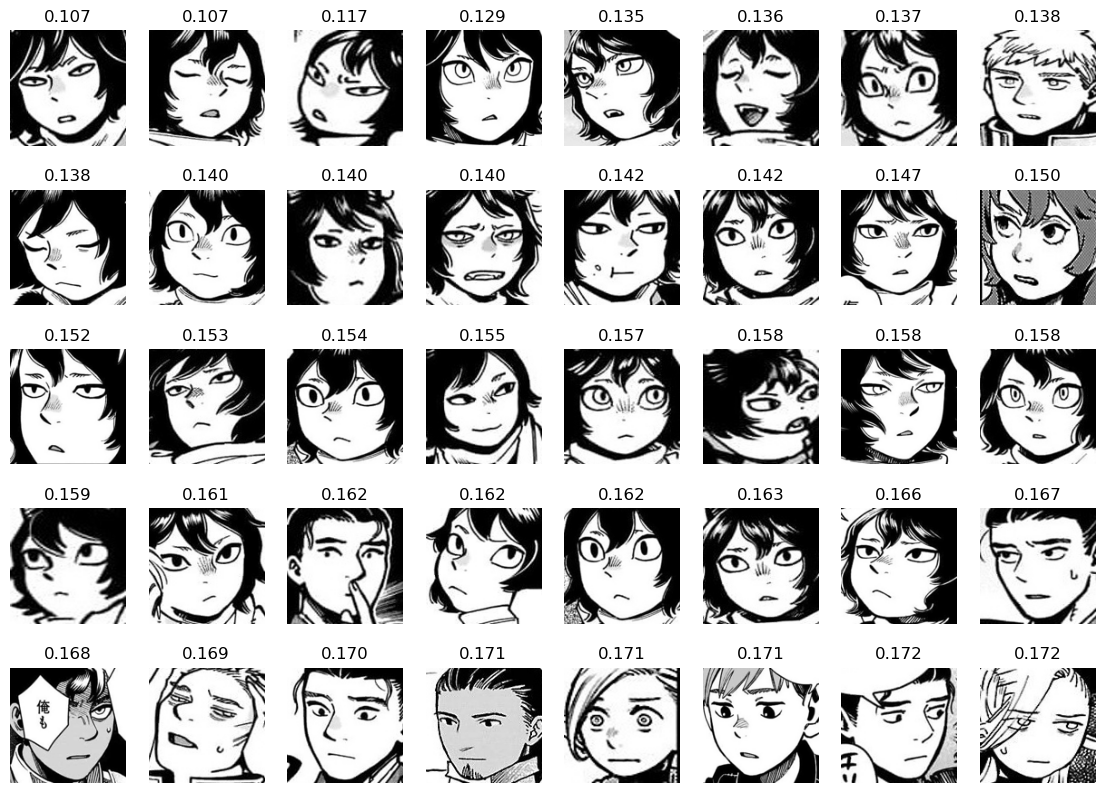

In [23]:
from src.recognitionModel import build_model, char_nearest_neighbor

IMG_SIZE = 128
EMBED_PATH = 'data/embeddings.npy'
CROP_PATH = 'data/crop_paths.json'

embed_model = build_model(IMG_SIZE, CROPS_DIR)
seed_paths = [str(p) for p in sorted(Path(IZUTSUMI_DIR).glob("*.jpg"))]

char_nearest_neighbor(EMBED_PATH, CROP_PATH, IMG_SIZE, embed_model, seed_paths)